In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('iter.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCCGTTGTATC...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCATTTTGTT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAAGTTAATGGTCTGGCTAGAT...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 58766.88it/s]


[0, 3, 9, 24, 37, 61, 74, 105, 133, 185, 227, 304, 361, 414, 465, 540, 650, 744, 802, 941, 1030, 1132, 1297, 1385, 1468, 1599, 1702, 1810, 1983, 2102, 2266, 2329, 2454, 2550, 2691, 2825, 2922, 3019, 3170, 3346, 3441, 3558, 3630, 3795, 3953, 4021, 4124, 4155, 4362, 4434, 4489, 4596, 4680, 4750, 4920, 5024, 5050, 5102, 5172, 5246, 5356, 5377, 5386, 5434, 5545, 5507, 5507, 5592, 5728, 5716, 5807, 5849, 5837, 5871, 6012, 5999, 6033, 6110, 6209, 6197, 6229, 6389, 6322, 6402, 6553, 6559, 6570, 6684, 6803, 6747, 6766, 6899, 7004, 7008, 7039, 7086, 7083, 7112, 7229, 7179, 7165, 7248, 7409, 7340, 7321, 7391, 7327, 7376, 7408, 7393]


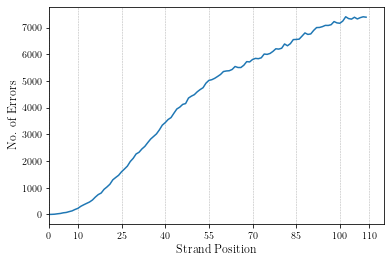

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-iter-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:10<00:00, 972.00it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


AA -> C 6
AA -> G 6
CC -> A 6
 -> TAG 6
TCT ->  6
 -> GTA 6
ATC ->  6
G -> AA 6
TC -> G 6
GAC ->  6
GG -> T 7
CC -> T 7
 -> TAC 7
TG -> A 7
 -> ATG 7
T -> AA 7
A -> CC 7
AC -> G 7
CCA ->  7
GG -> C 7
T -> GG 7
GT -> C 8
C -> AA 8
AGT ->  8
G -> CT 9
TA -> C 9
GA -> C 9
CAT ->  9
C -> GG 10
GT -> A 10
TC -> A 10
CA -> T 10
A -> CG 10
AG -> C 11
AG -> T 11
T -> CA 11
G -> CC 11
TT -> C 11
A -> TT 11
C -> TT 12
T -> GA 12
TA -> G 12
G -> TA 12
T -> AC 12
C -> AG 12
GA -> T 13
C -> TG 13
AT -> C 13
AT -> G 13
C -> GA 14
G -> CA 14
G -> AT 14
G -> AC 14
GC -> T 14
CT -> G 14
TG -> C 14
C -> TA 14
CG -> T 14
T -> AG 14
A -> TC 14
CG -> A 15
TT -> A 15
A -> TG 15
A -> CT 16
CA -> G 16
AC -> T 17
C -> GT 17
CT -> A 17
T -> CG 18
A -> GT 19
A -> GC 20
T -> GC 21
C -> AT 24
GG ->  31
 -> AA 31
 -> CC 34
TT ->  38
AA ->  42
 -> TT 45
 -> GG 46
CC ->  48
TG ->  53
AC ->  54
AG ->  56
GA ->  64
TC ->  68
CT ->  68
CG ->  68
TA ->  69
AT ->  69
 -> CA 70
CA ->  74
GT ->  75
 -> AT 77
GC ->  77
 -> A

A -> C @ 46 6
 -> TG @ 57 6
 -> TC @ 56 6
A -> C @ 83 6
GC ->  @ 59 6
A -> C @ 41 6
C -> G @ 45 6
A -> C @ 44 6
A -> C @ 40 6
AT ->  @ 57 6
C ->  @ 99 6
 -> TG @ 60 6
T -> A @ 65 6
T -> A @ 45 6
 -> A @ 109 6
T ->  @ 18 6
T -> A @ 40 6
 -> C @ 104 6
A ->  @ 89 6
A ->  @ 101 6
T -> A @ 28 6
C -> G @ 22 6
A -> T @ 85 6
A -> C @ 66 6
C ->  @ 19 6
C ->  @ 16 6
GA ->  @ 55 6
A -> C @ 70 6
A -> G @ 75 6
A -> T @ 73 6
C ->  @ 11 6
TT ->  @ 55 6
A -> T @ 82 6
T -> A @ 87 6
C -> A @ 45 6
T ->  @ 99 6
C -> T @ 71 6
C -> T @ 69 6
G ->  @ 13 6
C -> T @ 58 6
T -> G @ 28 6
C -> T @ 50 6
C -> T @ 46 6
G -> T @ 38 6
C -> T @ 84 6
G -> T @ 40 6
G -> A @ 49 6
G -> A @ 48 6
G -> T @ 44 6
G -> T @ 45 6
G ->  @ 20 6
G -> A @ 47 6
G ->  @ 21 6
T -> C @ 43 6
C -> T @ 41 6
T -> C @ 46 6
 -> G @ 108 6
T -> C @ 50 6
T -> G @ 35 6
T -> C @ 73 6
G -> A @ 65 6
G -> C @ 48 6
G -> C @ 63 6
G -> C @ 46 6
 -> GC @ 52 6
 -> GC @ 60 6
 -> GA @ 62 6
G -> C @ 84 6
T -> G @ 81 6
T ->  @ 98 6
T -> C @ 72 6
G -> A @ 63 6
T -

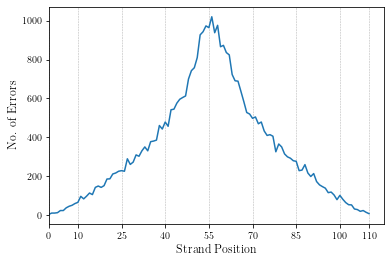

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-iter-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 1, 3, 3, 5, 8, 8, 7, 11, 16, 15, 21, 20, 18, 17, 22, 20, 24, 25, 26, 31, 31, 30, 31, 31, 39, 31, 46, 33, 52, 59, 39, 59, 64, 60, 64, 57, 59, 72, 60, 77, 61, 88, 80, 82, 73, 80, 89, 91, 103, 101, 99, 142, 143, 146, 100, 117, 123, 124, 128, 110, 116, 101, 94, 82, 86, 84, 83, 89, 73, 69, 56, 60, 76, 67, 62, 72, 81, 59, 59, 54, 68, 42, 38, 43, 46, 37, 36, 40, 46, 35, 38, 27, 32, 34, 35, 22, 25, 14, 16, 22, 20, 15, 12, 14, 3, 4, 4, 2, 3, 2]
[2, 2, 0, 4, 4, 4, 12, 8, 8, 8, 21, 13, 17, 20, 25, 26, 32, 25, 32, 24, 27, 27, 38, 36, 39, 36, 25, 50, 37, 40, 50, 54, 43, 50, 54, 67, 54, 52, 61, 92, 64, 71, 73, 93, 88, 82, 87, 89, 88, 82, 104, 117, 128, 132, 125, 116, 126, 114, 134, 112, 114, 99, 92, 90, 78, 90, 77, 84, 68, 69, 68, 87, 63, 71, 72, 65, 71, 64, 51, 58, 46, 44, 47, 48, 42, 45, 38, 41, 42, 43, 41, 36, 32, 27, 23, 25, 21, 17, 20, 17, 19, 15, 13, 5, 9, 8, 7, 3, 6, 0, 0]
[1, 3, 5, 2, 5, 4, 4, 12, 9, 14, 4, 26, 10, 12, 23, 17, 21, 26, 23, 34, 27, 29, 33, 37, 39, 26, 52, 45, 45, 31, 54, 4

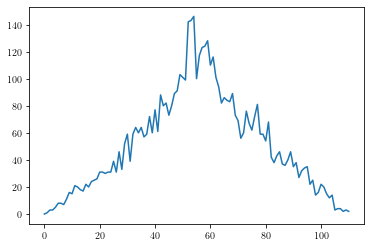

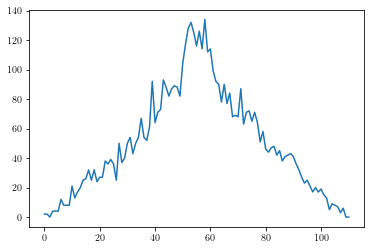

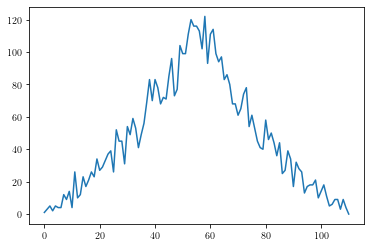

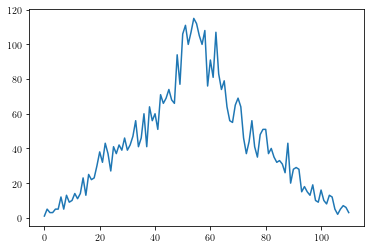

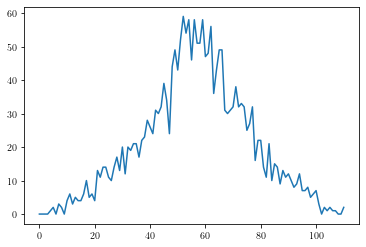

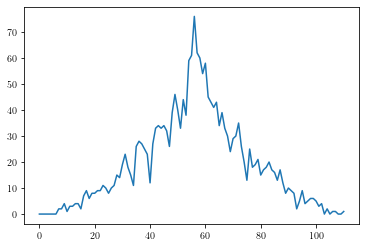

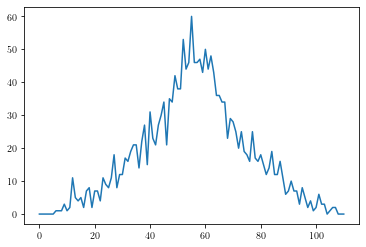

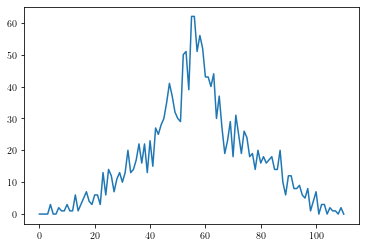

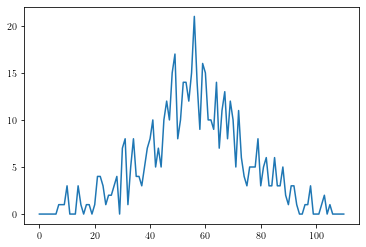

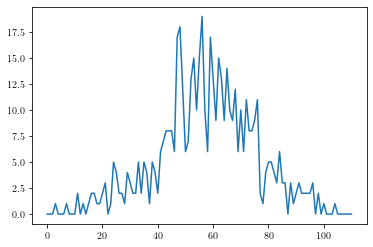

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)